# Generación de modelos inteligentes utilizando PySpark y MLLib
**Joel Isaias Solano Ocampo | A01639289**

## 1. Preparación del ambiente de trabajo para Big Data en Colab


---



In [4]:
!pip install pyspark py4j

In [5]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
spark = SparkSession.builder.appName("tec").getOrCreate()

In [9]:
def plt_plot(lst, x, y, t):
  plt.plot(lst)
  plt.xlabel(str(x))
  plt.ylabel(str(y))
  plt.title(str(t))
  plt.show()

## 2. Genera un modelo de regresión utilizando PySpark y MLlib


---



### Regression:

* Linear Regression:

In [10]:
from pyspark.ml.regression import LinearRegression

In [12]:
# Load training data
training = spark.read.format("libsvm")\
    .load("/content/drive/MyDrive/Colab_Notebooks/content/sample_linear_regression_data.txt")

In [13]:
lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [14]:
# Fit the model
lrModel = lr.fit(training)

In [15]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

Coefficients: [0.0,0.3229251667740594,-0.3438548034562219,1.915601702345841,0.05288058680386255,0.765962720459771,0.0,-0.15105392669186676,-0.21587930360904645,0.2202536918881343]
Intercept: 0.15989368442397356


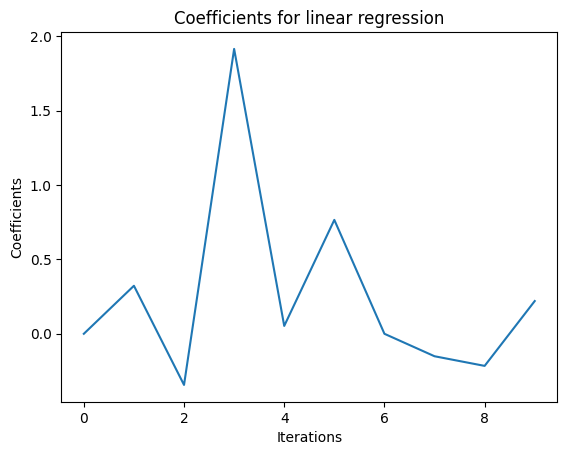

In [16]:
plt.plot(lrModel.coefficients)
plt.xlabel("Iterations")
plt.ylabel("Coefficients")
plt.title("Coefficients for linear regression")
plt.show()

In [17]:
# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

numIterations: 6
objectiveHistory: [0.49999999999999994, 0.4967620357443381, 0.49363616643404634, 0.4936351537897608, 0.4936351214177871, 0.49363512062528014, 0.4936351206216114]
+--------------------+
|           residuals|
+--------------------+
|  -9.889232683103197|
|  0.5533794340053553|
|  -5.204019455758822|
| -20.566686715507508|
|    -9.4497405180564|
|  -6.909112502719487|
|  -10.00431602969873|
|  2.0623978070504845|
|  3.1117508432954772|
|  -15.89360822941938|
|  -5.036284254673026|
|  6.4832158769943335|
|  12.429497299109002|
|  -20.32003219007654|
|    -2.0049838218725|
| -17.867901734183793|
|   7.646455887420495|
| -2.2653482182417406|
|-0.10308920436195645|
|  -1.380034070385301|
+--------------------+
only showing top 20 rows

RMSE: 10.189077
r2: 0.022861


## 3. Genera un modelo de clasificación utilizando PySpark y MLlib:


---



### Classification:

- Logistic Regression:

In [19]:
from pyspark.ml.classification import LogisticRegression

In [21]:
# Load training data
training = spark.read.format("libsvm").load("/content/drive/MyDrive/Colab_Notebooks/content/sample_libsvm_data.txt")

In [22]:
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [23]:
# Fit the model
lrModel = lr.fit(training)

In [24]:
# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

Coefficients: (692,[272,300,323,350,351,378,379,405,406,407,428,433,434,435,455,456,461,462,483,484,489,490,496,511,512,517,539,540,568],[-7.520689871384125e-05,-8.115773146847006e-05,3.814692771846427e-05,0.0003776490540424338,0.0003405148366194403,0.0005514455157343107,0.0004085386116096912,0.0004197467332749452,0.0008119171358670031,0.000502770837266875,-2.3929260406600902e-05,0.0005745048020902297,0.0009037546426803677,7.818229700243899e-05,-2.1787551952911914e-05,-3.402165821789542e-05,0.0004966517360637633,0.0008190557828370372,-8.017982139522613e-05,-2.743169403783527e-05,0.0004810832226238988,0.0004840801762677878,-8.926472920009901e-06,-0.00034148812330427297,-8.950592574121382e-05,0.00048645469116892156,-8.478698005186097e-05,-0.00042347832158317705,-7.296535777631246e-05])
Intercept: -0.5991460286401438


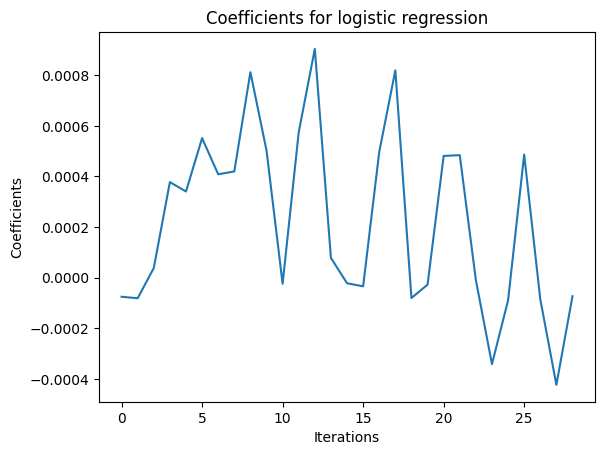

In [30]:
plt.plot(lrModel.coefficients)
plt.xlabel("Iterations")
plt.ylabel("Coefficients")
plt.title("Coefficients for logistic regression")
plt.show()

In [25]:
# We can also use the multinomial family for binary classification
mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")

In [26]:
# Fit the model
mlrModel = mlr.fit(training)

In [27]:
# Print the coefficients and intercepts for logistic regression with multinomial family
print("Multinomial coefficients: " + str(mlrModel.coefficientMatrix))
print("Multinomial intercepts: " + str(mlrModel.interceptVector))

Multinomial coefficients: 2 X 692 CSRMatrix
(0,272) 0.0001
(0,300) 0.0001
(0,350) -0.0002
(0,351) -0.0001
(0,378) -0.0003
(0,379) -0.0002
(0,405) -0.0002
(0,406) -0.0004
(0,407) -0.0002
(0,433) -0.0003
(0,434) -0.0005
(0,435) -0.0001
(0,456) 0.0
(0,461) -0.0002
(0,462) -0.0004
(0,483) 0.0001
..
..
Multinomial intercepts: [0.27505875857180895,-0.27505875857180895]


## 4. Genera un agrupamiento utilizando PySpark y MLlib:


---



### Clustering:

- K-means:

In [39]:
import plotly.graph_objects as go
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [31]:
# Loads data.
dataset = spark.read.format("libsvm").load("/content/drive/MyDrive/Colab_Notebooks/content/sample_kmeans_data.txt")

In [32]:
# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

In [33]:
# Make predictions
predictions = model.transform(dataset)

In [34]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

In [35]:
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.9997530305375207


In [41]:
# Shows the result.
cen_list = list()
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
  print(center)
  cen_list.append(center)
fig = go.Figure( go.Scatter(x=cen_list[0], y=cen_list[1] ) )
fig.show()


Cluster Centers: 
[9.1 9.1 9.1]
[0.1 0.1 0.1]
